## Spearman Coefficients

References for help
Code: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
Assumptions of Spearman Correlation: https://www.youtube.com/watch?v=JwNwbu-g2m0

1. Samples should be random or representative (requirement met)
2. Two variables have a monotonic relationship. If one variable increases, the other must always decrease or always increase. Can't go up then down.(requirement met)
3. Data must be ordinal (requirement met)
4. Data contains paired samples (requirement met)
5. Observations should be independent (requirement met)
6. Data does not have to be sampled from normal distribution. 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
from scipy import optimize  #Used to fit the regression
import matplotlib.pyplot as plt
import pandas as pd  #Used for general data manipulation
import os
import seaborn as sns

### Functions

In [2]:
def spearman_function(data, intermittency_ind, filtered_cond): 
    
    #setup data                  
    int_pred = data.drop(['year','days_no_flow_observed','no_flow_start_date_doy','flow_returns_doy','peak_discharge_to_dry_duration_days','dry_binary'], axis=1, inplace=False)
    int_ind = data[['year','days_no_flow_observed','no_flow_start_date_doy','flow_returns_doy','peak_discharge_to_dry_duration_days','dry_binary']]

    # create table of Spearman Coefficients 
    column_names = list(int_pred.columns.values)
    spearman = pd.DataFrame(column_names, columns=['Variables'])

    spearman_coef = []
    spearman_p = []

    for i in range(len(spearman)):
        x = int_pred.iloc[:, i]
        y = int_ind[intermittency_ind]
        coef, p = spearmanr(x,y)
        spearman_coef.append(coef)
        spearman_p.append(p)
        if p<0.1:
            spearman.at[i, intermittency_ind+'_significant?'] = 'yes'
        else:
            spearman.at[i, intermittency_ind+'_significant?'] = 'no'
        ## add coef of variation
        #coef_of_variation = abs(x.std()/x.mean())
        #spearman.at[i, 'variable_coef_of_variation'] = coef_of_variation

    spearman[intermittency_ind+'_sp_coef'] = spearman_coef
    spearman[intermittency_ind+'_sp_p'] = spearman_p

    results = spearman.sort_values(by=intermittency_ind+'_sp_p', ascending=True)
    results.reset_index(drop=True, inplace=True)

    ## Export ## 
    results.to_csv(r'./results/spearman_results/'+intermittency_ind+'spearman'+filtered_cond+'.csv', index = False)
    return(results)

### No Flow Duration

In [3]:
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
intermittency_ind = 'days_no_flow_observed'
filtered_cond = 'filtered'
no_flow_duration_days_results = spearman_function(data, intermittency_ind, filtered_cond)
#display(no_flow_duration_days_results)

In [4]:
### All Variables ###
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.astype(float)
intermittency_ind = 'days_no_flow_observed'
filtered_cond = 'unfiltered'
no_flow_duration_days_results_unfiltered = spearman_function(data, intermittency_ind, filtered_cond)
display(no_flow_duration_days_results_unfiltered)

,Variables,days_no_flow_observed_significant?,days_no_flow_observed_sp_coef,days_no_flow_observed_sp_p
0,ET_JAS_WY,yes,-0.803334,0.000059
1,ET_July,yes,-0.789842,0.000097
2,ET_August,yes,-0.746250,0.000376
3,PET_cum_WY,yes,0.694355,0.001387
4,P_AMJ_WY,yes,-0.689165,0.001558
...,...,...,...,...
138,ET_OND_WY-1,no,NaN,NaN
139,PET_OND_WY-1,no,NaN,NaN
140,temp_before_flow_returns,no,NaN,NaN
141,temp_after_flow_returns,no,NaN,NaN


### First Day Dry 

In [5]:
# Filtered Variables #
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.dropna(axis=0) #drop any row with NaN
data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
intermittency_ind = 'no_flow_start_date_doy'
filtered_cond = 'filtered'
no_flow_start_date_doy_results = spearman_function(data, intermittency_ind, filtered_cond)
#display(no_flow_start_date_doy_results)

In [6]:
## All Variables ##
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.dropna(axis=0) #drop any row with NaN
data = data.astype(float)
intermittency_ind = 'no_flow_start_date_doy'
filtered_cond = 'unfiltered'
no_flow_start_date_doy_results_unfiltered = spearman_function(data, intermittency_ind, filtered_cond)
display(no_flow_start_date_doy_results_unfiltered)

,Variables,no_flow_start_date_doy_significant?,no_flow_start_date_doy_sp_coef,no_flow_start_date_doy_sp_p
0,ET_JAS_WY,yes,0.830812,0.000435
1,Tmean_May,yes,-0.806053,0.000876
2,ET_July,yes,0.764788,0.002324
3,full_melt_doy,yes,0.694215,0.008472
4,PET_cum_WY,yes,-0.690510,0.008980
...,...,...,...,...
138,PET_JAS_WY,no,-0.033012,0.914740
139,ET_October,no,-0.024759,0.936009
140,Tmean_MAM_WY-1,no,-0.019257,0.950211
141,fraction_snow_OND_WY,no,-0.005502,0.985767


### Flow Return DOY

In [7]:
# Filtered Variables #
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.dropna(axis=0) #drop any row with NaN
data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
intermittency_ind = 'flow_returns_doy'
filtered_cond = 'filtered'
flow_returns_doy_results = spearman_function(data, intermittency_ind, filtered_cond)
data
#display(flow_returns_doy_results)

,year,days_no_flow_observed,no_flow_start_date_doy,flow_returns_doy,peak_discharge_to_dry_duration_days,dry_binary,max_discharge_doy,SWE_max_WY,SWE_max_WY-1,peak_to_melt_duration,...,PET_JAS_WY,PET_OND_WY,PET_JFM_WY-1,PET_JAS_WY-1,PET_cum_WY-1,la_nina_WY,la_nina_WY-1,days_no_flow_observed_WY-1,temp_before_flow_returns,temp_after_flow_returns
0,2001.0,59.0,207.0,256.0,127.0,1.0,80.0,20.6,28.8,31.0,...,59.654675,14.476735,18.229206,58.868595,15746.2930,-0.400,-1.025,16.0,11.10,10.36
1,2002.0,39.0,207.0,260.0,103.0,1.0,104.0,27.8,20.6,53.0,...,57.038967,16.717836,17.667940,59.654675,13123.1300,0.250,-0.400,59.0,14.58,8.58
2,2004.0,14.0,224.0,230.0,141.0,1.0,83.0,28.7,22.9,65.0,...,54.491550,18.354887,15.883489,59.409607,13136.1180,0.375,0.450,16.0,18.72,13.78
3,2005.0,44.0,217.0,253.0,78.0,1.0,139.0,20.2,28.7,44.0,...,57.435380,14.458436,16.097878,54.491550,12804.1630,0.375,0.375,14.0,12.90,4.36
4,2007.0,76.0,188.0,261.0,117.0,1.0,71.0,21.7,33.9,58.0,...,57.869480,17.066435,13.527661,57.984640,12677.1530,-0.025,-0.300,0.0,11.82,8.22
5,2008.0,51.0,217.0,264.0,90.0,1.0,127.0,30.0,21.7,47.0,...,58.011383,15.943196,19.375078,57.869480,13374.2790,-1.000,-0.025,76.0,12.52,6.66
8,2012.0,21.0,221.0,243.0,129.0,1.0,92.0,22.1,31.7,39.0,...,58.276733,16.003061,13.182602,56.616974,11647.9390,-0.425,-1.000,0.0,13.78,11.24
9,2013.0,77.0,191.0,268.0,94.0,1.0,97.0,14.4,22.1,41.0,...,55.603090,16.231367,15.957176,58.276733,12881.9980,-0.250,-0.425,21.0,8.60,4.20
10,2014.0,77.0,195.0,270.0,149.0,1.0,46.0,25.4,14.4,47.0,...,55.823772,16.631186,16.482447,55.603090,12739.0380,-0.100,-0.250,77.0,13.38,6.12
11,2015.0,73.0,182.0,264.0,141.0,1.0,41.0,13.2,25.4,68.0,...,56.176815,17.557356,16.767515,55.823772,12921.7790,0.975,-0.100,77.0,4.44,10.98


In [8]:
# All Variables ##
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.dropna(axis=0) #drop any row with NaN
data = data.astype(float)
intermittency_ind = 'flow_returns_doy'
filtered_cond = 'unfiltered'
flow_returns_doy_results_unfiltered = spearman_function(data, intermittency_ind, filtered_cond)
#display(flow_returns_doy_results_unfiltered)

### Dry Down Duration

In [9]:
# Filtered Variables #
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
display(data)
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.dropna(axis=0) #drop any row with NaN
data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
intermittency_ind = 'peak_discharge_to_dry_duration_days'
filtered_cond = 'filtered'
peak_discharge_to_dry_duration_days_results = spearman_function(data, intermittency_ind, filtered_cond)
#display(peak_discharge_to_dry_duration_days_results)

,year,days_no_flow_observed,no_flow_start_date_doy,flow_returns_doy,peak_discharge_to_dry_duration_days,dry_binary,year.1,max_discharge_doy,SWE_max_WY,SWE_max_WY-1,...,PET_JAS_WY,PET_OND_WY,PET_JFM_WY-1,PET_JAS_WY-1,PET_cum_WY-1,la_nina_WY,la_nina_WY-1,days_no_flow_observed_WY-1,temp_before_flow_returns,temp_after_flow_returns
0,2001,59.0,207.0,256.0,127.0,1.0,2001,80.0,20.6,28.8,...,59.654675,14.476735,18.229206,58.868595,15746.2930,-0.400,-1.025,16.0,11.10,10.36
1,2002,39.0,207.0,260.0,103.0,1.0,2002,104.0,27.8,20.6,...,57.038967,16.717836,17.667940,59.654675,13123.1300,0.250,-0.400,59.0,14.58,8.58
2,2004,14.0,224.0,230.0,141.0,1.0,2004,83.0,28.7,22.9,...,54.491550,18.354887,15.883489,59.409607,13136.1180,0.375,0.450,16.0,18.72,13.78
3,2005,44.0,217.0,253.0,78.0,1.0,2005,139.0,20.2,28.7,...,57.435380,14.458436,16.097878,54.491550,12804.1630,0.375,0.375,14.0,12.90,4.36
4,2007,76.0,188.0,261.0,117.0,1.0,2007,71.0,21.7,33.9,...,57.869480,17.066435,13.527661,57.984640,12677.1530,-0.025,-0.300,0.0,11.82,8.22
5,2008,51.0,217.0,264.0,90.0,1.0,2008,127.0,30.0,21.7,...,58.011383,15.943196,19.375078,57.869480,13374.2790,-1.000,-0.025,76.0,12.52,6.66
6,2009,0.0,NaN,NaN,NaN,0.0,2009,112.0,26.1,30.0,...,55.641937,16.406816,13.214120,58.011383,12460.7660,-0.200,-1.000,51.0,NaN,NaN
7,2011,0.0,NaN,NaN,NaN,0.0,2011,17.0,31.7,25.9,...,56.616974,15.762539,14.688388,56.294796,11814.8670,-1.000,0.275,0.0,NaN,NaN
8,2012,21.0,221.0,243.0,129.0,1.0,2012,92.0,22.1,31.7,...,58.276733,16.003061,13.182602,56.616974,11647.9390,-0.425,-1.000,0.0,13.78,11.24
9,2013,77.0,191.0,268.0,94.0,1.0,2013,97.0,14.4,22.1,...,55.603090,16.231367,15.957176,58.276733,12881.9980,-0.250,-0.425,21.0,8.60,4.20


In [10]:
# All Variables ##
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
display(data)
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.dropna(axis=0) #drop any row with NaN
data = data.astype(float)
intermittency_ind = 'peak_discharge_to_dry_duration_days'
filtered_cond = 'unfiltered'
peak_discharge_to_dry_duration_days_results_unfiltered = spearman_function(data, intermittency_ind, filtered_cond)
#display(peak_discharge_to_dry_duration_days_results_unfiltered)
data

,year,max_discharge_Ls,max_discharge_doy,total_acft_passed_WY,SWE_max_WY,SWE_max_WY-1,SWE_max_doy,full_melt_doy,peak_to_melt_duration,cum_P_WY,...,la_nina_WY-1,days_no_flow_observed,no_flow_start_date_doy,flow_returns_doy,peak_discharge_to_dry_duration_days,days_no_flow_observed_WY-1,dry_binary,temp_before_flow_returns,temp_after_flow_returns,precip_in_window
0,2001,793.441333,80.0,2365.126703,20.6,28.8,105,136,31,23.5,...,-1.025,59.0,207.0,256.0,127.0,16.0,1.0,11.10,10.36,0.4
1,2002,1725.387208,104.0,2120.289109,27.8,20.6,93,146,53,24.7,...,-0.400,39.0,207.0,260.0,103.0,59.0,1.0,14.58,8.58,0.3
2,2004,1318.600792,83.0,2853.103167,28.7,22.9,72,137,65,28.3,...,0.450,14.0,224.0,230.0,141.0,16.0,1.0,18.72,13.78,0.7
3,2005,387.975292,139.0,1910.118478,20.2,28.7,96,140,44,25.8,...,0.375,44.0,217.0,253.0,78.0,14.0,1.0,12.90,4.36,0.0
4,2007,403.405778,71.0,1515.357531,21.7,33.9,71,129,58,29.4,...,-0.300,76.0,188.0,261.0,117.0,0.0,1.0,11.82,8.22,0.4
5,2008,743.087542,127.0,2712.074608,30.0,21.7,104,151,47,29.6,...,-0.025,51.0,217.0,264.0,90.0,76.0,1.0,12.52,6.66,0.7
6,2009,907.262167,112.0,3166.229559,26.1,30.0,101,145,44,34.7,...,-1.000,0.0,NaN,NaN,NaN,51.0,0.0,NaN,NaN,NaN
7,2011,1798.613500,17.0,5296.959910,31.7,25.9,123,169,46,40.9,...,0.275,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
8,2012,893.452250,92.0,3015.478899,22.1,31.7,98,137,39,31.5,...,-1.000,21.0,221.0,243.0,129.0,0.0,1.0,13.78,11.24,0.0
9,2013,161.256708,97.0,1075.577047,14.4,22.1,86,127,41,26.5,...,-0.425,77.0,191.0,268.0,94.0,21.0,1.0,8.60,4.20,1.9


,year,max_discharge_Ls,max_discharge_doy,total_acft_passed_WY,SWE_max_WY,SWE_max_WY-1,SWE_max_doy,full_melt_doy,peak_to_melt_duration,cum_P_WY,...,la_nina_WY-1,days_no_flow_observed,no_flow_start_date_doy,flow_returns_doy,peak_discharge_to_dry_duration_days,days_no_flow_observed_WY-1,dry_binary,temp_before_flow_returns,temp_after_flow_returns,precip_in_window
1,2002.0,1725.387208,104.0,2120.289109,27.8,20.6,93.0,146.0,53.0,24.7,...,-0.400,39.0,207.0,260.0,103.0,59.0,1.0,14.58,8.58,0.3
2,2004.0,1318.600792,83.0,2853.103167,28.7,22.9,72.0,137.0,65.0,28.3,...,0.450,14.0,224.0,230.0,141.0,16.0,1.0,18.72,13.78,0.7
3,2005.0,387.975292,139.0,1910.118478,20.2,28.7,96.0,140.0,44.0,25.8,...,0.375,44.0,217.0,253.0,78.0,14.0,1.0,12.90,4.36,0.0
4,2007.0,403.405778,71.0,1515.357531,21.7,33.9,71.0,129.0,58.0,29.4,...,-0.300,76.0,188.0,261.0,117.0,0.0,1.0,11.82,8.22,0.4
5,2008.0,743.087542,127.0,2712.074608,30.0,21.7,104.0,151.0,47.0,29.6,...,-0.025,51.0,217.0,264.0,90.0,76.0,1.0,12.52,6.66,0.7
8,2012.0,893.452250,92.0,3015.478899,22.1,31.7,98.0,137.0,39.0,31.5,...,-1.000,21.0,221.0,243.0,129.0,0.0,1.0,13.78,11.24,0.0
9,2013.0,161.256708,97.0,1075.577047,14.4,22.1,86.0,127.0,41.0,26.5,...,-0.425,77.0,191.0,268.0,94.0,21.0,1.0,8.60,4.20,1.9
10,2014.0,579.777458,46.0,2468.547467,25.4,14.4,97.0,144.0,47.0,29.5,...,-0.250,77.0,195.0,270.0,149.0,77.0,1.0,13.38,6.12,1.4
11,2015.0,761.157500,41.0,2723.230317,13.2,25.4,48.0,116.0,68.0,29.9,...,-0.100,73.0,182.0,264.0,141.0,77.0,1.0,4.44,10.98,1.1
12,2016.0,862.791250,67.0,4119.960026,26.4,13.2,89.0,130.0,41.0,33.4,...,0.975,53.0,208.0,260.0,141.0,73.0,1.0,6.94,8.90,0.1


In [11]:
### Export Top 10 Variables for each in one dataframe
top_ten = pd.concat([no_flow_duration_days_results, no_flow_start_date_doy_results, flow_returns_doy_results, peak_discharge_to_dry_duration_days_results], axis=1).head(10)
display(top_ten)

## Export ##
top_ten.to_csv(r'./results/spearman_results/top_ten_spearman_filtered_variables.csv', index = False)

,Variables,days_no_flow_observed_significant?,days_no_flow_observed_sp_coef,days_no_flow_observed_sp_p,Variables,no_flow_start_date_doy_significant?,no_flow_start_date_doy_sp_coef,no_flow_start_date_doy_sp_p,Variables,flow_returns_doy_significant?,flow_returns_doy_sp_coef,flow_returns_doy_sp_p,Variables,peak_discharge_to_dry_duration_days_significant?,peak_discharge_to_dry_duration_days_sp_coef,peak_discharge_to_dry_duration_days_sp_p
0,ET_JAS_WY,yes,-0.803334,0.000059,ET_JAS_WY,yes,0.792953,0.000716,P_as_rain_OND_WY-1,yes,0.698353,0.005469,max_discharge_doy,yes,-0.726276,0.003266
1,P_AMJ_WY,yes,-0.689165,0.001558,Tmean_AMJ_WY,yes,-0.625552,0.016727,days_no_flow_observed_WY-1,yes,0.577607,0.030530,ET_OND_WY,yes,-0.554089,0.039783
2,SWE_max_WY,yes,-0.601982,0.008209,max_discharge_doy,yes,0.588107,0.026962,temp_after_flow_returns,yes,-0.508295,0.063472,P_JFM_WY,yes,0.548069,0.042450
3,Tmean_AMJ_WY,yes,0.506495,0.031957,P_JAS_WY,yes,-0.507201,0.064139,temp_before_flow_returns,yes,-0.497245,0.070441,fraction_snow_JFM_WY,yes,-0.474618,0.086378
4,P_as_rain_OND_WY-1,yes,0.436956,0.069807,SWE_max_WY,yes,0.462556,0.095832,P_JAS_WY,yes,0.493333,0.073033,PET_JAS_WY,yes,-0.470203,0.089759
5,Tmean_JAS_WY-1,yes,0.433842,0.072053,P_AMJ_WY,no,0.449340,0.106989,Tmean_OND_WY-1,yes,-0.475145,0.085980,Tmean_JAS_WY-1,no,-0.412808,0.142390
6,max_discharge_doy,yes,-0.421387,0.081575,P_as_rain_OND_WY-1,no,-0.418503,0.136417,Tmean_JAS_WY-1,no,0.371276,0.191217,P_JAS_WY,no,0.397337,0.159484
7,P_as_rain_OND_WY,yes,0.420349,0.082408,temp_before_flow_returns,no,0.396477,0.160472,max_discharge_doy,no,-0.362436,0.202833,PET_OND_WY,no,0.390732,0.167174
8,ET_OND_WY,yes,0.409970,0.091084,P_as_rain_JFM_WY-1,no,-0.383261,0.176161,SWE_max_WY-1,no,-0.353597,0.214886,ET_AMJ_WY,no,0.364242,0.200425
9,ET_AMJ_WY,no,-0.385061,0.114577,ET_AMJ_WY,no,0.381058,0.178868,P_AMJ_WY,no,-0.335917,0.240308,la_nina_WY,no,0.329284,0.250300


In [12]:
### Export Top 40 Variables for each in one dataframe
top_forty = pd.concat([no_flow_duration_days_results_unfiltered, no_flow_start_date_doy_results_unfiltered, flow_returns_doy_results_unfiltered, peak_discharge_to_dry_duration_days_results_unfiltered], axis=1).head(50)
display(top_forty)

## Export ##
top_forty.to_csv(r'./results/spearman_results/top_fifty_spearman_all_variables.csv', index = False)

,Variables,days_no_flow_observed_significant?,days_no_flow_observed_sp_coef,days_no_flow_observed_sp_p,Variables,no_flow_start_date_doy_significant?,no_flow_start_date_doy_sp_coef,no_flow_start_date_doy_sp_p,Variables,flow_returns_doy_significant?,flow_returns_doy_sp_coef,flow_returns_doy_sp_p,Variables,peak_discharge_to_dry_duration_days_significant?,peak_discharge_to_dry_duration_days_sp_coef,peak_discharge_to_dry_duration_days_sp_p
0,ET_JAS_WY,yes,-0.803334,0.000059,ET_JAS_WY,yes,0.830812,0.000435,fraction_snow_OND_WY-1,yes,-0.853604,0.000206,max_discharge_doy,yes,-0.756918,0.002740
1,ET_July,yes,-0.789842,0.000097,Tmean_May,yes,-0.806053,0.000876,P_as_snow_OND_WY-1,yes,-0.693381,0.008584,PET_August,yes,-0.734818,0.004220
2,ET_August,yes,-0.746250,0.000376,ET_July,yes,0.764788,0.002324,P_as_rain_OND_WY-1,yes,0.674043,0.011524,ET_Aridity_WY,yes,0.701668,0.007516
3,PET_cum_WY,yes,0.694355,0.001387,full_melt_doy,yes,0.694215,0.008472,Tmean_October,yes,-0.632606,0.020324,P_February,yes,0.674043,0.011524
4,P_AMJ_WY,yes,-0.689165,0.001558,PET_cum_WY,yes,-0.690510,0.008980,Tmean_May,yes,0.624319,0.022559,P_as_rain_JFM_WY,yes,0.613269,0.025816
5,ET_cum_WY,yes,-0.683976,0.001746,P_as_snow_OND_WY-1,yes,0.690510,0.008980,days_no_flow_observed_WY-1,yes,0.526318,0.064646,total_acft_passed_WY,yes,0.591169,0.033353
6,PET_AMJ_WY,yes,0.676711,0.002041,P_January,yes,0.674003,0.011531,ET_April,yes,-0.524870,0.065521,cum_P_WY,yes,0.585644,0.035464
7,PET_June,yes,0.654915,0.003181,ET_August,yes,0.674003,0.011531,precip_in_window,yes,0.517338,0.070204,ET_OND_WY,yes,-0.569069,0.042382
8,full_melt_doy,yes,-0.645907,0.003783,ET_cum_WY,yes,0.665750,0.012995,ET_November,yes,-0.513820,0.072469,P_JFM_WY,yes,0.569069,0.042382
9,PET_Aridity_WY,yes,-0.621702,0.005879,P_November,yes,-0.655647,0.014973,temp_before_flow_returns,yes,-0.513820,0.072469,P_August,yes,0.555556,0.048704


In [13]:
## create function to do linear regression and Spearman
#quick linear regression
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import uncertainties.unumpy as unp
import uncertainties as unc

def spearman(data, x_col_name, y_col_name, x_label, y_label, tab_loc):
    x = data[x_col_name]
    y = data[y_col_name]
    axis_label_size = 30
    ## Spearman ##
    coef, p = spearmanr(x,y)
    print('Spearmans correlation coefficient: %.3f' % coef)
    alpha = 0.05 # set statistical significance valu
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)
        
    ## linear regression ## 
    
    #calculate slope, intercept, r, p, std error for linear regression
    mask = ~np.isnan(x) & ~np.isnan(y) #mask NaN values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask]) #outputs slope, intercept
    
    def myfunc(x):
        return slope * x + intercept
    
    #calculate regression confidence interval
    px = np.linspace(min(x)-1, max(x)+1, 100) #model extent
    py = slope*px+intercept
    py_nom = unp.nominal_values(py)
    std = unp.std_devs(py)
    fig = plt.figure(figsize=(10,10), facecolor='white')
    ax1 = sns.regplot(data=data, x=x_col_name, y=y_col_name, color = 'black', line_kws={'linewidth':4},scatter_kws={'alpha':0.50, 's':60}, ci = 95)
    ax1.set_xlim([min(x)-(max(x)/1000), max(x)+(max(x)/1000)]) #set x axis limits
    ax1.set_ylim([min(y)-(max(y)/100), max(y)+(max(y)/100)]) #set y axis limits
    ax1.tick_params(axis='y', colors='black', labelsize=20)
    ax1.set_ylabel(y_label, size=axis_label_size, color = 'black')
    ax1.set_xlabel(x_label, size=axis_label_size, color = 'black')
    ax1.tick_params(axis='x', colors='black', labelsize=20)
    #defining the attributes
    col_labels = ['Results']
    row_labels = ['Spearman Coeff','Spearman p','Linear Reg R$^{2}$', 'Linear Reg p']
    table_vals = [[str(coef)[:5]], [str(p)[:5]], [str(r_value**2)[:5]], [str(p_value)[:5]]]
    #plotting
    my_table = ax1.table(cellText=table_vals, colWidths=[0.05], rowLabels=row_labels, loc=tab_loc)#, fontsize=40)
    my_table.scale(4, 4)
    my_table.auto_set_font_size(False)
    my_table.set_fontsize(22)
    #my_table.set_fontsize(25)
    #if p_value < alpha:
        #ax1.legend(prop={'size': 20}, loc = 'lower right', labels = ['Annual Values', 'R$^{2}$ = '+str(r_value**2)[:6]+'*'+', Spearman Coeff = '+str(coef)[:4],'95% CI','Spearman Coeff = '+str(coef)[:4]])
    #else:
        #ax1.legend(prop={'size': 20}, loc = 'lower right', labels = ['Annual Values', 'R$^{2}$ = '+str(r_value**2)[:6]])     
    fig.savefig('./results/spearman_results/spearman_plots/'+ x_col_name + ' vs ' + y_col_name, dpi=300, bbox_inches='tight')
    display('P from linear regression = ' +str(p_value))

,no_flow_start_date_doy,full_melt_doy
1,207.0,146.0
2,224.0,137.0
3,217.0,140.0
4,188.0,129.0
5,217.0,151.0
8,221.0,137.0
9,191.0,127.0
10,195.0,144.0
11,182.0,116.0
12,208.0,130.0


Spearmans correlation coefficient: 0.694
Samples are correlated (reject H0) p=0.008


'P from linear regression = 0.005529772977955465'

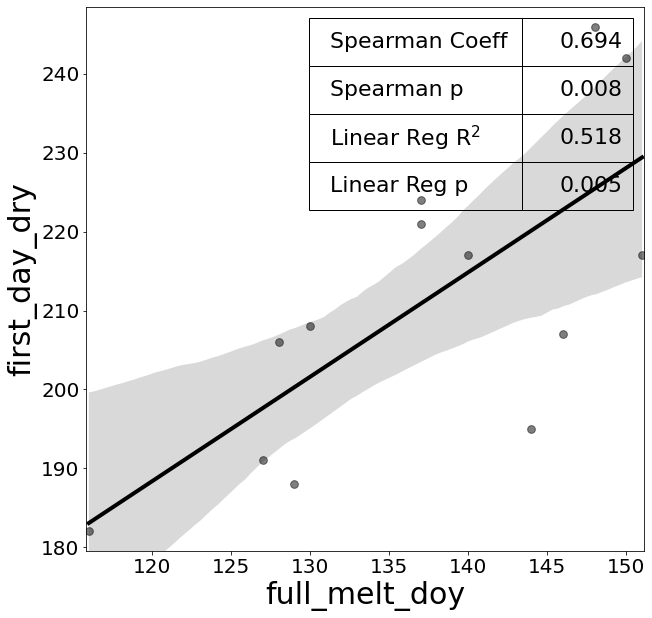

In [14]:
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
#data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.dropna(axis=0) #drop any row with NaN
data = data.astype(float)
display(data[['no_flow_start_date_doy','full_melt_doy']])
y_col_name = 'no_flow_start_date_doy'
y_label = 'first_day_dry'
x_col_name = 'full_melt_doy'
x_label = 'full_melt_doy'
tab_loc = 'upper right'

spearman(data, x_col_name, y_col_name, x_label, y_label, tab_loc)

Spearmans correlation coefficient: -0.602
Samples are correlated (reject H0) p=0.008


'P from linear regression = 0.011698106808628834'

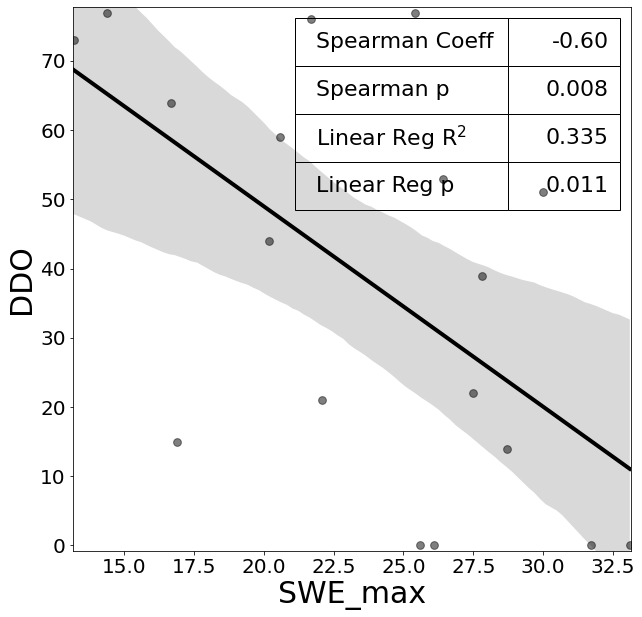

In [15]:
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
y_col_name = 'days_no_flow_observed'
y_label = 'DDO'
x_col_name = 'SWE_max_WY'
x_label = 'SWE_max'
tab_loc = 'upper right'

spearman(data, x_col_name, y_col_name, x_label, y_label, tab_loc)

Spearmans correlation coefficient: 0.742
Samples are correlated (reject H0) p=0.000


'P from linear regression = 0.0005409451283933459'

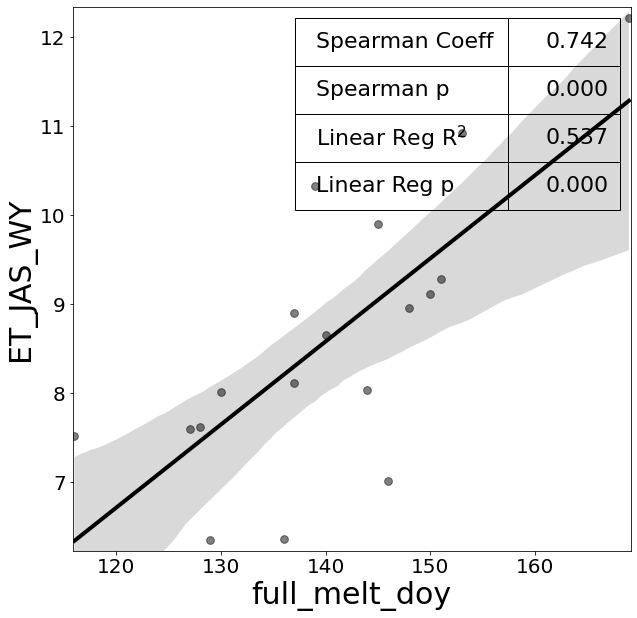

In [16]:
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
#data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
y_col_name = 'ET_JAS_WY'
y_label = 'ET_JAS_WY'
x_col_name = 'full_melt_doy'
x_label = 'full_melt_doy'
tab_loc = 'upper right'

spearman(data, x_col_name, y_col_name, x_label, y_label, tab_loc)

Spearmans correlation coefficient: 0.672
Samples are correlated (reject H0) p=0.002


'P from linear regression = 0.0007433581523420163'

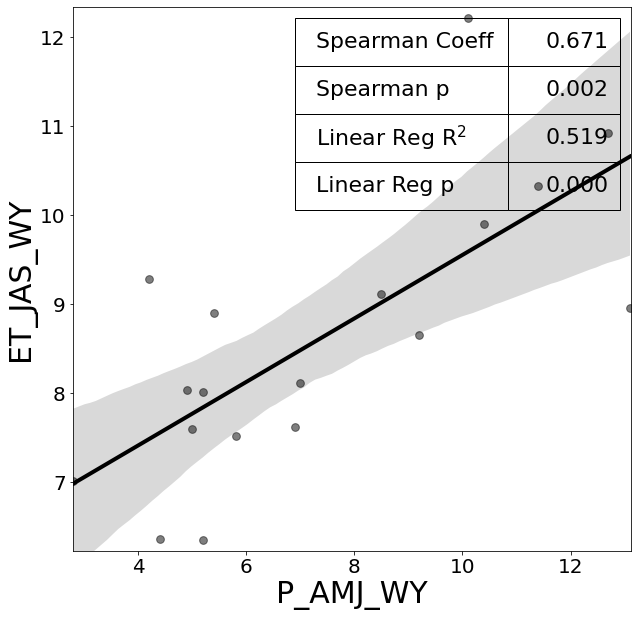

In [17]:
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
#data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
y_col_name = 'ET_JAS_WY'
y_label = 'ET_JAS_WY'
x_col_name = 'P_AMJ_WY'
x_label = 'P_AMJ_WY'
tab_loc = 'upper right'

spearman(data, x_col_name, y_col_name, x_label, y_label, tab_loc)

Spearmans correlation coefficient: -0.761
Samples are correlated (reject H0) p=0.000


'P from linear regression = 4.691979394480438e-05'

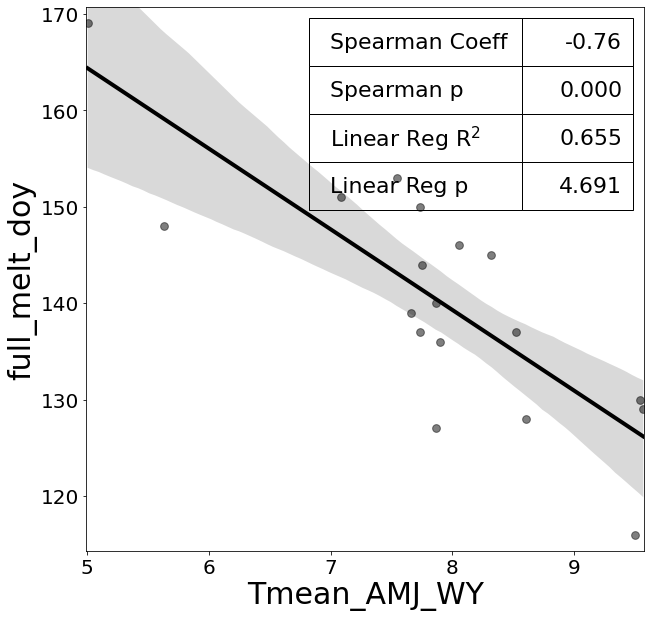

In [18]:
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
#data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
y_col_name = 'full_melt_doy'
y_label = 'full_melt_doy'
x_col_name = 'Tmean_AMJ_WY'
x_label = 'Tmean_AMJ_WY'
tab_loc = 'upper right'

spearman(data, x_col_name, y_col_name, x_label, y_label, tab_loc)

Spearmans correlation coefficient: 0.598
Samples are correlated (reject H0) p=0.009


'P from linear regression = 0.008257949096050725'

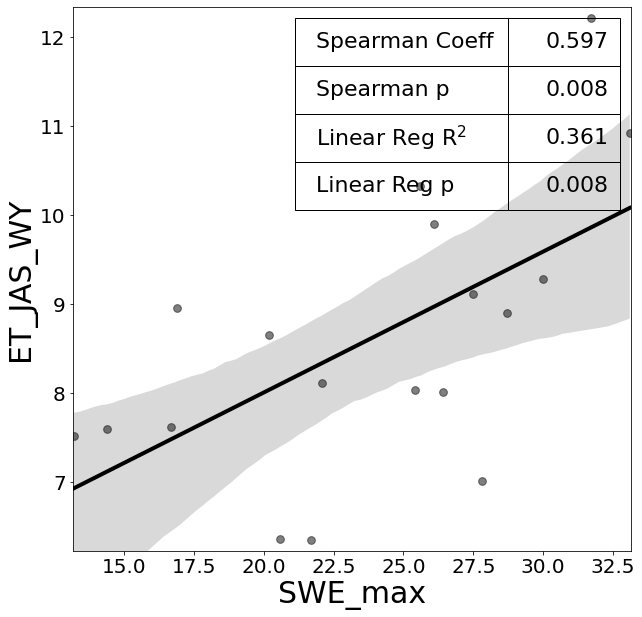

In [19]:
data = pd.read_csv("./master_data/all_variables_bad_flow_removed.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
#data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
y_col_name = 'ET_JAS_WY'
y_label = 'ET_JAS_WY'
x_col_name = 'SWE_max_WY'
x_label = 'SWE_max'
tab_loc = 'upper right'

spearman(data, x_col_name, y_col_name, x_label, y_label, tab_loc)

Spearmans correlation coefficient: -0.803
Samples are correlated (reject H0) p=0.000


'P from linear regression = 8.131199763753634e-05'

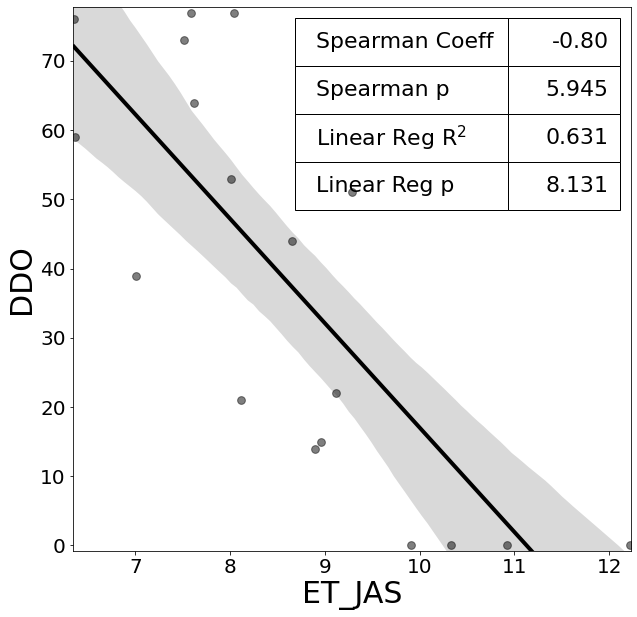

In [20]:
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
y_col_name = 'days_no_flow_observed'
y_label = 'DDO'
x_col_name = 'ET_JAS_WY'
x_label = 'ET_JAS'
tab_loc = 'upper right'

spearman(data, x_col_name, y_col_name, x_label, y_label, tab_loc)

Spearmans correlation coefficient: -0.689
Samples are correlated (reject H0) p=0.002


'P from linear regression = 0.0006022671293142035'

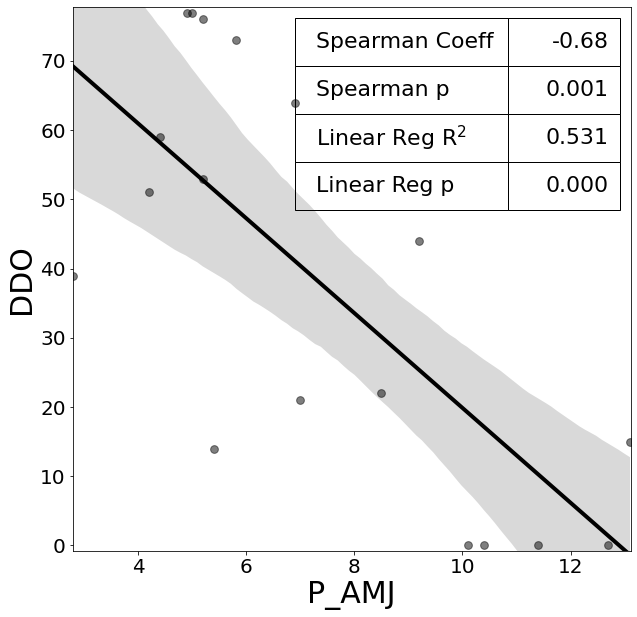

In [21]:
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)
y_col_name = 'days_no_flow_observed'
y_label = 'DDO'
x_col_name = 'P_AMJ_WY'
x_label = 'P_AMJ'
tab_loc = 'upper right'

spearman(data, x_col_name, y_col_name, x_label, y_label, tab_loc)

### Archive